<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Statements" data-toc-modified-id="Import-Statements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Statements</a></span></li><li><span><a href="#Load-and-Prepare-Data" data-toc-modified-id="Load-and-Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Prepare Data</a></span></li><li><span><a href="#train_test_split" data-toc-modified-id="train_test_split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>train_test_split</a></span></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper Functions</a></span><ul class="toc-item"><li><span><a href="#Data-pure?" data-toc-modified-id="Data-pure?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data pure?</a></span></li><li><span><a href="#Classify" data-toc-modified-id="Classify-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classify</a></span></li><li><span><a href="#Potential-Splits?" data-toc-modified-id="Potential-Splits?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Potential Splits?</a></span></li><li><span><a href="#Split-data" data-toc-modified-id="Split-data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Split data</a></span></li><li><span><a href="#Lowest-Overall-Entropy?" data-toc-modified-id="Lowest-Overall-Entropy?-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Lowest Overall Entropy?</a></span></li><li><span><a href="#Decision-Tree-Algorithm" data-toc-modified-id="Decision-Tree-Algorithm-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Decision Tree Algorithm</a></span><ul class="toc-item"><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Algorithm</a></span></li></ul></li></ul></li><li><span><a href="#classfication" data-toc-modified-id="classfication-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>classfication</a></span></li></ul></div>

First, we should image the final work we should done. We functionality we should realize and what part of code are design for particular functionality.

df = pd.read_csv("data.csv")

train_df, test_df = train_test_split(df, test_size_propotion = 0.2)  
tree = decision_tree_algorithm(train_df)  
accuracy = calculate_accuracy(test_df, tree)

# Import Statements

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random 
from pprint import pprint

# Load and Prepare Data

In [3]:
df = pd.read_csv("./data/iris-species/Iris.csv")
df = df.drop('Id', axis = 1)
df = df.rename(columns = {"Species":"label"})

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# train_test_split

In [5]:
def train_test_split(df, test_size, random_state=0):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    random.seed = random_state
    test_index = random.sample(population=indices, k=test_size)
    test_df = df.loc[test_index]
    train_df = df.drop(test_index)
    return train_df, test_df

In [6]:
train_df, test_df = train_test_split(df, 0.1)

In [7]:
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


# Helper Functions

In [8]:
# for fast computation, we use numpy instead of pandas
data = train_df.values

In [9]:
data[:5] 

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

每次写函数之前，先找好一套这个函数会用到的输入值，方便进行调试。

## Data pure?

In [10]:
def check_purity(data):
    label_column = data[:, -1]
    np.unique(label_column)

    if len(np.unique(label_column)) == 1:
        return True
    else:
        return False

In [11]:
check_purity(train_df[train_df['PetalLengthCm'] < 0.8].values)

False

In [12]:
train_df[train_df['PetalLengthCm'] < 0.8].values

array([], shape=(0, 5), dtype=object)

需要注意传入空值时候的处理

## Classify

In [13]:
def classify_data(data):
    """
    input:data in the node,dataframe with last column as its label
    output: the prediction result on this node, one class in the label
    """
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column,
                                                      return_counts=True)
    classification = unique_classes[counts_unique_classes.argmax()]
    return classification

In [14]:
classify_data(train_df[train_df['PetalLengthCm'] < 10].values)

'Iris-setosa'

## Potential Splits?


In [15]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                potential_splits[column_index].append(potential_split)
    return potential_splits

In [16]:
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [17]:
get_potential_splits(train_df.values)

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.25,
  7.35,
  7.5,
  7.65,
  7.800000000000001],
 1: [2.1,
  2.25,
  2.3499999999999996,
  2.45,
  2.55,
  2.6500000000000004,
  2.75,
  2.8499999999999996,
  2.95,
  3.05,
  3.1500000000000004,
  3.25,
  3.3499999999999996,
  3.45,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.300000000000001],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.7999999999999998,
  2.45,
  3.15,
  3.4,
  3.55,
  3.6500000000000004,
  3.75,
  3.8499999999999996,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.199999999999999,
  6.35,
  6.5,
  6.65,
  6.800000000000001],
 3: [0.150000000

In [18]:
potential_splits = get_potential_splits(train_df.values)

In [19]:
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


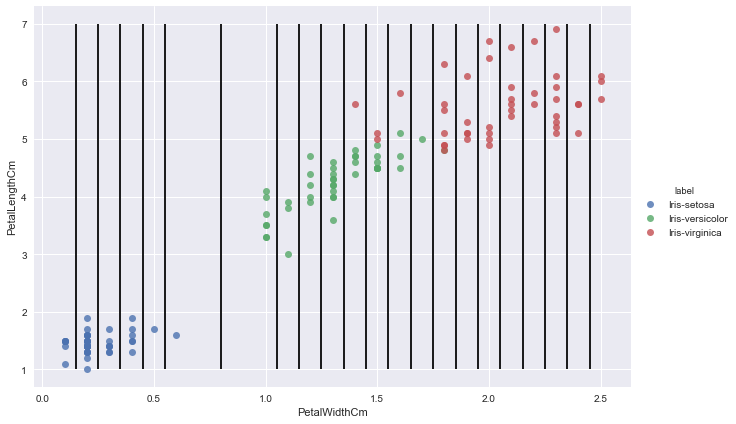

In [20]:
sns.lmplot(data=train_df, x='PetalWidthCm', y='PetalLengthCm',
           hue='label', fit_reg=False,
           size=6, aspect=1.5)
plt.vlines(x=potential_splits[3], ymin=1, ymax=7)
# plt.hlines(y = potential_splits[2], xmin = 0, xmax = 2.5)

## Split data

In [21]:
def split_data(data, split_column, split_value):
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]

    return data_below, data_above

In [22]:
split_column = 3
split_value = 0.8

In [23]:
data_below, data_above = split_data(data, split_column, split_value)

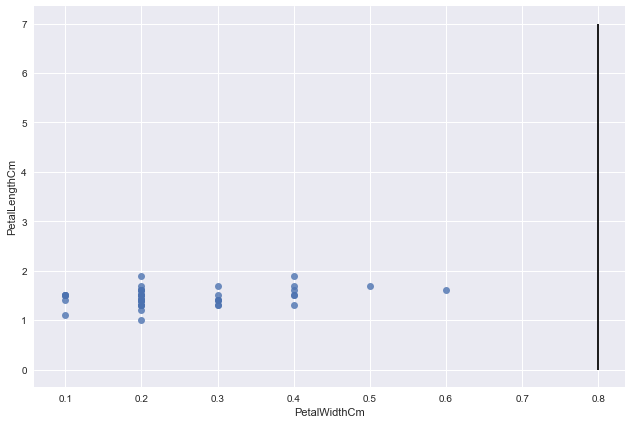

In [24]:
# plot the data we get, check if it is right

# plotting_df = pd.DataFrame(data, columns = df.columns)
plotting_df = pd.DataFrame(data_below, columns=df.columns)

sns.lmplot(data=plotting_df, x='PetalWidthCm', y='PetalLengthCm',
           fit_reg=False, size=6, aspect=1.5)
plt.vlines(x=split_value, ymin=0, ymax=7)

可以像up主一样，搞一个流程图之类的软件，看起来很好用，可以画流程，也可以写公式。

## Lowest Overall Entropy?

In [25]:
def calculate_entropy(data):
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)
    probability = counts / counts.sum()
    entropy = - np.sum(probability * np.log2(probability))
    return entropy

In [26]:
calculate_entropy(data_above)

0.99990893034980854

In [27]:
def calculate_overall_entropy(data_below, data_above):
    n_data_points = len(data_above) + len(data_below)

    p_data_above = len(data_above)/n_data_points
    p_data_below = len(data_below)/n_data_points

    overall_entropy = (p_data_above*calculate_entropy(data_above) +
                       p_data_below*calculate_entropy(data_below))
    return overall_entropy

In [28]:
calculate_overall_entropy(data_below, data_above)

0.65919922074913295

In [29]:
def determine_best_split(data, potential_splits):
    overall_entropy = 999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,
                                                split_column=column_index,
                                                split_value=value)
            current_overall_entropy = calculate_overall_entropy(
                data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    return best_split_column, best_split_value

In [30]:
potential_splits = get_potential_splits(data)

In [31]:
determine_best_split(data, potential_splits)

(3, 0.8)

## Decision Tree Algorithm

sub_tree = {question: [yes_answer, no_answer]}

In [32]:
example_tree = {"petal_width <= 0.8" : ["Iris-setosa",
                                       {"petal_width <= 4.9":[{"petal_length<= 4.9":["Iris-versicolor",
                                                                                      "Iris-virginica"]},
                                                               "Iris-virginica"]}]}

### Algorithm

In [33]:
def decision_tree_algorithm(df, counter = 0, min_samples = 5, max_depth  = 5):
    """
    input: a dataframe
    output: our decision tree
    """
    
    if counter == 0:
        global column_headers
        column_headers = df.columns
        data = df.values
        
    else:
        data = df
    
    #  base case
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    
    # recursive part
    else:
        counter += 1
        
        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data,potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = column_headers[split_column]
        question = "{} <= {}".format(feature_name,split_value)
        sub_tree = {question : []}
        
        # find answer for each part of tree
        yes_answer = decision_tree_algorithm(data_below, counter,min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter,min_samples,max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree
        
     

In [34]:
tree = decision_tree_algorithm(train_df,max_depth = 3)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalLengthCm <= 4.85': ['Iris-versicolor',
                                                    'Iris-virginica']}]}


# classfication

In [36]:
example = test_df.iloc[0]
example

SepalLengthCm                5.7
SepalWidthCm                 2.8
PetalLengthCm                4.1
PetalWidthCm                 1.3
label            Iris-versicolor
Name: 99, dtype: object

In [ ]:
def classify_example(example):
    